In [40]:
import pandas as pd
data = pd.read_csv("loan_approval_dataset.csv")
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [41]:
print(data.isnull().sum())

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [42]:
print(data.shape)

(4269, 13)


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load data
data = pd.read_csv("loan_approval_dataset.csv")

# Check for missing values
print("Missing values in the dataset:\n", data.isnull().sum())

# Prepare features and labels
X = data.iloc[:, :-1]
y = data.iloc[:, -1]  # Keep the original target column for now

# Handle missing values in X
imputer = SimpleImputer(strategy="most_frequent")
X = imputer.fit_transform(X)

# Use LabelEncoder for categorical features in X
label_encoders = {}
for column in range(X.shape[1]):
    if isinstance(X[0][column], str):  # Check if the column is of string type
        le = LabelEncoder()
        X[:, column] = le.fit_transform(X[:, column])
        label_encoders[column] = le  # Save the encoder if needed later

# Handle missing values in y
y.fillna(y.mode()[0], inplace=True)  # Fill missing target values with mode

# Use LabelEncoder for y
y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Train the model
model = DecisionTreeClassifier(criterion="entropy", random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Classification report and confusion matrix
report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
print(cm)


Missing values in the dataset:
 loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64
Accuracy: 0.9718969555035128
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1044
           1       0.97      0.96      0.96       664

    accuracy                           0.97      1708
   macro avg       0.97      0.97      0.97      1708
weighted avg       0.97      0.97      0.97      1708

[[1024   20]
 [  28  636]]


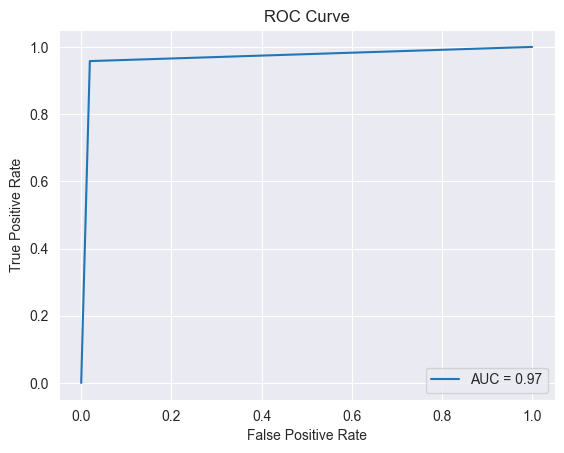

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Encode y values (Approved -> 1, Rejected -> 0)
y_encoder = LabelEncoder()
y_test_encoded = y_encoder.fit_transform(y_test)  # Encode y_test to 0s and 1s

# Get predicted probabilities for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate False Positive Rate (fpr), True Positive Rate (tpr), and thresholds
fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_proba)

# Calculate AUC score
auc = roc_auc_score(y_test_encoded, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()



In [45]:
X.shape[1]

12

In [46]:
X[1].shape

(12,)

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

# Load data
data = pd.read_csv("loan_approval_dataset.csv")

# Check for missing values
print("Missing values in the dataset:\n", data.isnull().sum())

# Prepare features and labels
X = data.iloc[:, :-1]
y = data.iloc[:, -1]  # Keep the original target column for now

# Handle missing values in X
imputer = SimpleImputer(strategy="most_frequent")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)  # Keep column names after imputation

# Use pd.get_dummies() for encoding categorical columns in X
X = pd.get_dummies(X)

# Handle missing values in y
y.fillna(y.mode()[0], inplace=True)  # Fill missing target values with mode

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Train the model
model = DecisionTreeClassifier(criterion="entropy", random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Classification report and confusion matrix
report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
print(cm)


Missing values in the dataset:
 loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64
Accuracy: 0.8747072599531616
              precision    recall  f1-score   support

    Approved       0.86      0.96      0.90      1044
    Rejected       0.92      0.75      0.82       664

    accuracy                           0.87      1708
   macro avg       0.89      0.85      0.86      1708
weighted avg       0.88      0.87      0.87      1708

[[998  46]
 [168 496]]


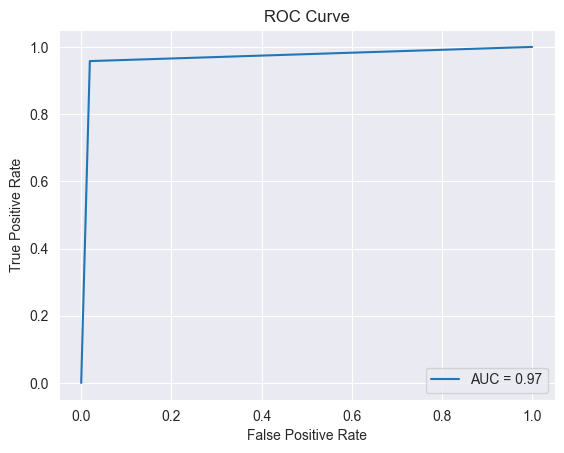

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate False Positive Rate (fpr), True Positive Rate (tpr), and thresholds
fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_proba)

# Calculate AUC score
auc = roc_auc_score(y_test_encoded, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()
